### 신용카드 거래사기 탐지

https://www.kaggle.com/mlg-ulb/creditcardfraud

### Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()
# Amount : 카드 결제 금액

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
# 결측값 확인
df.isnull().sum()

Time      1
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
# 결측치 처리
df = df.dropna(subset=['Time', 'Amount', 'Class'])
df.isnull().sum().sum()

0

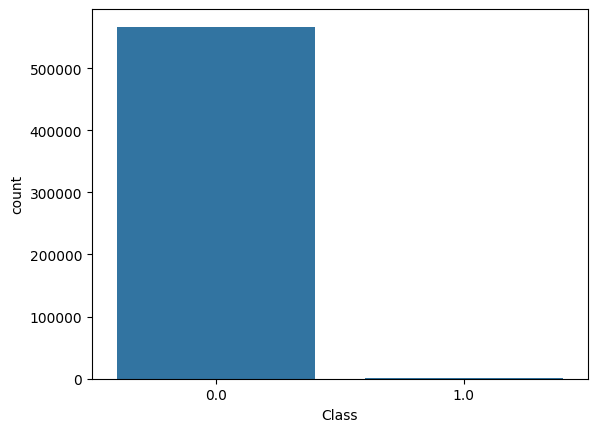

In [11]:
# Target Class 분포 -> 불균형 데이터
sns.countplot(x='Class', data=df);

In [12]:
# Class 분포 비율
df.Class.value_counts() / len(df)

Class
0.0    0.99827
1.0    0.00173
Name: count, dtype: float64

In [13]:
# Class 제외한 데이터
X = df.iloc[:, :-1].copy()
y = df.iloc[:, -1].copy()

X.shape, y.shape

((567628, 30), (567628,))

In [14]:
# 피처 스케일링
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X.iloc[:, 1:] = scaler.fit_transform(X.iloc[:, 1:])

X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,567628.000000,5.676280e+05,5.676280e+05,5.676280e+05,5.676280e+05,5.676280e+05,5.676280e+05,5.676280e+05,5.676280e+05,5.676280e+05,...,5.676280e+05,5.676280e+05,5.676280e+05,5.676280e+05,5.676280e+05,5.676280e+05,5.676280e+05,5.676280e+05,5.676280e+05,5.676280e+05
mean,95142.928804,-1.115332e-17,-1.201704e-17,-3.765340e-17,-9.713777e-18,1.712429e-17,-1.181676e-17,9.012782e-19,-1.477095e-18,5.157314e-18,...,-3.229580e-18,-1.128475e-17,-1.316868e-17,1.822585e-17,2.320791e-17,-4.846874e-17,3.642666e-18,8.136540e-19,-1.990323e-18,2.203125e-18
std,47243.531465,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,0.000000,-2.877383e+01,-4.399659e+01,-3.185639e+01,-4.012206e+00,-8.238707e+01,-1.963303e+01,-3.520053e+01,-6.126594e+01,-1.222097e+01,...,-7.063601e+01,-4.740173e+01,-1.505834e+01,-7.166998e+01,-4.683440e+00,-1.973771e+01,-5.399766e+00,-5.589090e+01,-4.672022e+01,-3.534681e-01
25%,54507.000000,-4.696873e-01,-3.622353e-01,-5.875287e-01,-5.992005e-01,-5.014202e-01,-5.767335e-01,-4.479231e-01,-1.748581e-01,-5.856046e-01,...,-2.744609e-01,-3.108992e-01,-7.475944e-01,-2.590282e-01,-5.853833e-01,-6.082599e-01,-6.779986e-01,-1.753549e-01,-1.604786e-01,-3.310012e-01
50%,85003.500000,9.343646e-03,3.953361e-02,1.185810e-01,-1.429904e-02,-3.922486e-02,-2.059156e-01,3.255697e-02,1.848182e-02,-4.680604e-02,...,-8.106917e-02,-3.979919e-02,9.536829e-03,-1.783179e-02,6.747943e-02,3.155543e-02,-1.083297e-01,3.386754e-03,3.384030e-02,-2.655196e-01
75%,139426.000000,6.712574e-01,4.865681e-01,6.776173e-01,5.243668e-01,4.435415e-01,2.992573e-01,4.613995e-01,2.738369e-01,5.437664e-01,...,1.724258e-01,2.542186e-01,7.290781e-01,2.364085e-01,7.259526e-01,6.729392e-01,4.992012e-01,2.254202e-01,2.368624e-01,-4.444900e-02
max,172792.000000,1.251746e+00,1.334675e+01,6.187349e+00,1.191514e+01,2.520744e+01,5.501217e+01,9.745518e+01,1.674132e+01,1.418685e+01,...,5.109498e+01,3.702108e+01,1.446466e+01,3.603384e+01,7.569575e+00,1.441735e+01,7.293019e+00,7.829798e+01,1.024865e+02,1.023510e+02


In [16]:
# 데이터 분리
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,    
                                                    test_size=0.3, 
                                                    stratify=y, 
                                                    random_state=42)
X_train.shape, y_train.shape

((397339, 30), (397339,))

### 불균형 데이터(Imbalanced Data) 

1. 데이터 수준 접근법

    1. 오버샘플링
        - 장점: 데이터 손실 없음
        - 단점: 과적합 위험, 계산 비용 증가
        -> 비슷한 데이터를 추가하기 때문에 (같은 특징을 중복해서 학습하는 것과 같은 효과다.)

    2. 언더샘플링
        - 장점: 계산 비용 감소
        - 단점: 정보 손실 가능성

#### A. 오버샘플링 (Over-sampling)

https://velog.io/@veonico/DS-Over-Sampling-RandomOverSampler-SMOTE-ADASYN

- SMOTE

    - SMOTE 는 KNN (K-Nearest Neighbors) 알고리즘을 기반으로 한다.

    - 기존의 KNN 알고리즘은 특정 데이터가 있을 때, 이웃한 데이터들의 클래스를 고려하지 않지만, SMOTE 에서는 이웃한 데이터들의 클래스를 고려한다.

- ADASYN

    - ADASYN 은 SMOTE 알고리즘의 단점을 보완하기 위한 기법이다. SMOTE 는 데이터를 전반적으로 증강시키기 때문에 학습이 어려운 데이터를 고려하지 못한다는 단점이 있다.

    - 특정 데이터 주변에 특정 데이터와 다른 클래스의 데이터의 수를 고려하여 증강시킨다. 즉, 특정 데이터와 다른 클래스의 데이터가 주변에 많을수록, 특정 데이터와 같은 클래스의 데이터를 많이 생성하여 클래스 간의 경게를 확고히 하고자 한다.

In [17]:
# SMOTE (Synthetic Minority Over-sampling Technique)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y) 

X_resampled.shape, y_resampled.shape

((1133292, 30), (1133292,))

In [18]:
# ADASYN (Adaptive Synthetic Sampling)

from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

X_resampled.shape, y_resampled.shape

((1133390, 30), (1133390,))

### B. 언더샘플링 (Under-sampling)

In [19]:
# Random Under-sampling

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

X_resampled.shape, y_resampled.shape

((1964, 30), (1964,))

In [20]:
# NearMiss

from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X, y)

X_resampled.shape, y_resampled.shape

((1964, 30), (1964,))

2. 알고리즘 수준 접근법

#### A. 비용 민감 학습 (Cost-sensitive Learning)

In [21]:
from sklearn.ensemble import RandomForestClassifier

# 클래스 가중치 설정
weights = {0: 1, 1: 10}  # 소수 클래스에 더 높은 가중치 부여
rf = RandomForestClassifier(class_weight=weights)

#### B. 앙상블 기법

In [22]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier

# Balanced Random Forest - 랜덤 포레스트의 변형으로 소수 클래스에 더 많은 가중치를 부여
brf = BalancedRandomForestClassifier(random_state=42)

# EasyEnsemble - 소수 클래스에 대해 여러 개의 분류기를 학습
eec = EasyEnsembleClassifier(random_state=42)

### 군집 분석

In [23]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

### K-Means

In [24]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)   

KMeans(n_clusters=5)

In [25]:
clusters = kmeans.labels_  
clusters

array([2, 2, 4, ..., 0, 3, 1], dtype=int32)

### DBSCAN

In [26]:
clustering = DBSCAN(eps=0.5, min_samples=5)
clustering.fit(X_train)  

DBSCAN()

In [27]:
clusters = clustering.labels_  
clusters

array([-1, -1, -1, ..., -1, -1, -1])

In [28]:
# 클래스 레이블과 비교
df_cluster = pd.DataFrame()
df_cluster['Class'] = y_train
df_cluster['Cluster'] = clusters
df_cluster

,Class,Cluster
212098,0.0,-1
451536,0.0,-1
151411,0.0,-1
254996,0.0,-1
255199,0.0,-1
...,...,...
558783,0.0,263
318054,0.0,-1
266524,0.0,-1
24330,0.0,-1


In [29]:
df_cluster['Class'].value_counts()

Class
0.0    396652
1.0       687
Name: count, dtype: int64

In [30]:
df_cluster['Cluster'].value_counts()

Cluster
-1      395265
 11         56
 41         39
 19         28
 33         27
         ...  
 159         5
 278         5
 158         5
 156         5
 277         5
Name: count, Length: 280, dtype: int64

### 군집 분석 결과와 실제 클래스 비교

In [31]:
df_cluster.loc[df_cluster['Cluster']==4, 'Class'].value_counts()

Class
0.0    5
Name: count, dtype: int64

In [32]:
df_cluster.loc[df_cluster['Cluster']==3, 'Class'].value_counts()

Class
0.0    13
Name: count, dtype: int64

In [33]:
df_cluster.loc[df_cluster['Cluster']==2, 'Class'].value_counts()

Class
0.0    6
Name: count, dtype: int64

In [34]:
df_cluster.loc[df_cluster['Cluster']==1, 'Class'].value_counts()

Class
0.0    7
Name: count, dtype: int64

In [35]:
df_cluster.loc[df_cluster['Cluster']==0, 'Class'].value_counts()

Class
0.0    5
Name: count, dtype: int64

### 주성분 분석 (PCA)

In [36]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
212098,138712.0,-0.179161,0.499423,-0.021136,-0.710898,0.921600,0.689679,0.515742,0.340577,-0.132901,...,0.036310,-0.234505,-0.215703,0.170650,-2.339214,-1.228429,0.508248,1.005387,0.408104,-0.346352
451536,119349.0,0.917042,-0.291735,-1.495632,0.158207,0.860166,0.735934,0.158409,0.283409,0.223882,...,-0.530259,0.351018,1.143138,0.011681,-2.878090,0.042330,1.384359,-0.144541,-0.322496,-0.121604
151411,95506.0,1.076825,0.162833,-1.325789,0.042359,0.610396,-0.876388,0.541962,-0.477405,0.991446,...,-0.272051,0.060379,0.765166,-0.139531,-0.607917,0.865192,0.424336,-0.263364,-0.294907,-0.347991
254996,157018.0,1.055645,0.080150,-1.140880,0.289954,0.305733,-0.640117,0.144867,-0.188295,0.475198,...,-0.202278,-0.500175,-1.337087,0.529948,0.788693,-0.494214,0.363344,-0.159895,-0.092717,-0.329522
255199,157114.0,-0.972135,-0.351923,1.244315,0.217811,-0.118607,0.422130,-1.054081,0.635481,-0.795368,...,-0.130244,-0.154469,0.172329,-0.359058,-1.778404,0.987223,-0.433643,0.453035,0.195409,-0.249529


In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=2021)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

X_train_pca = pd.DataFrame(data=X_train_pca, index=X_train.index)
X_train_pca.head()

,0,1
212098,43578.294746,-0.419990
451536,24215.294754,-0.140603
151411,372.294749,-0.469433
254996,61884.294757,-0.434979
255199,61980.294732,-0.274093


In [38]:
X_train_pca.shape

(397339, 2)

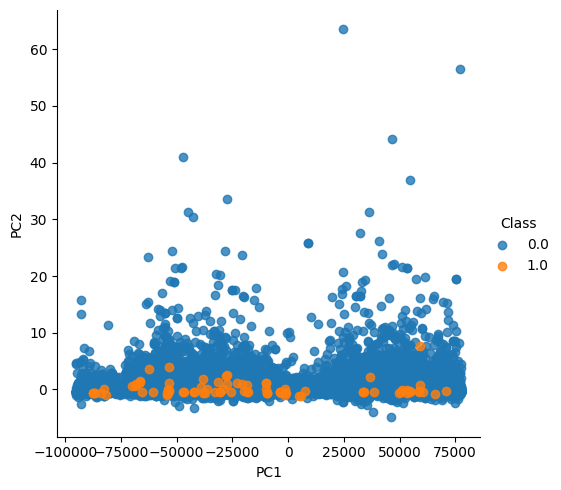

In [39]:
temp = pd.DataFrame(data=X_train_pca.iloc[:50000,:])
temp = pd.concat((temp, y_train.iloc[:50000]), axis=1, join="inner")
temp.columns = ["PC1", "PC2", "Class"]

sns.lmplot(x="PC1", y="PC2", hue="Class", 
           data=temp, fit_reg=False)

### t-SNE

In [40]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train.iloc[:50000])

X_train_tsne = pd.DataFrame(data=X_train_tsne, index=X_train.iloc[:50000].index)
X_train_tsne.head()

,0,1
212098,56.133350,-92.275528
451536,18.588089,138.083176
151411,3.954961,-87.525970
254996,88.426582,-14.713957
255199,87.410393,-18.851334


In [41]:
X_train_tsne.shape

(50000, 2)

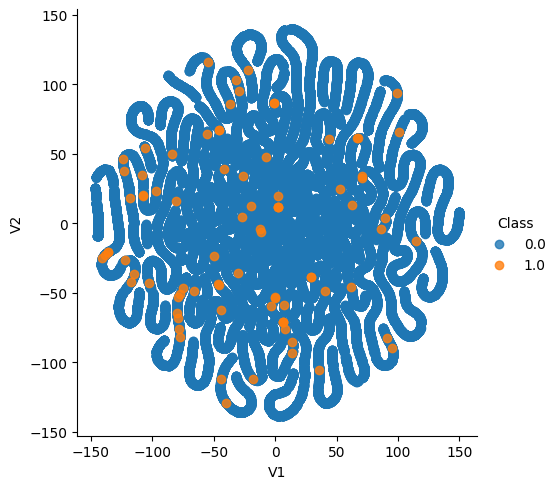

In [42]:
temp = pd.DataFrame(data=X_train_tsne)
temp = pd.concat((temp, y_train.iloc[:50000]), axis=1, join="inner")
temp.columns = ["V1", "V2", "Class"]

sns.lmplot(x="V1", y="V2", hue="Class", 
           data=temp, fit_reg=False)